In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing dataset
data=pd.read_csv("titanic.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


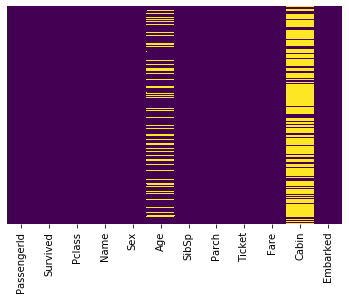

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

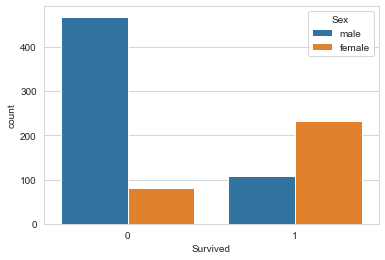

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data)

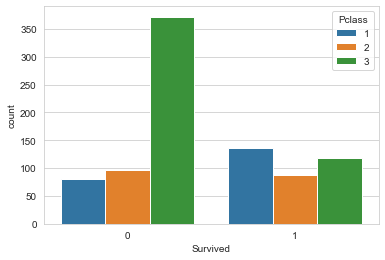

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=data)

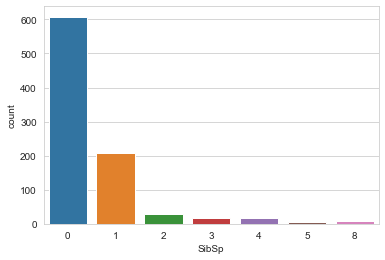

In [9]:
#count plot on siblings and spouse
sns.countplot(x='SibSp',data=data)

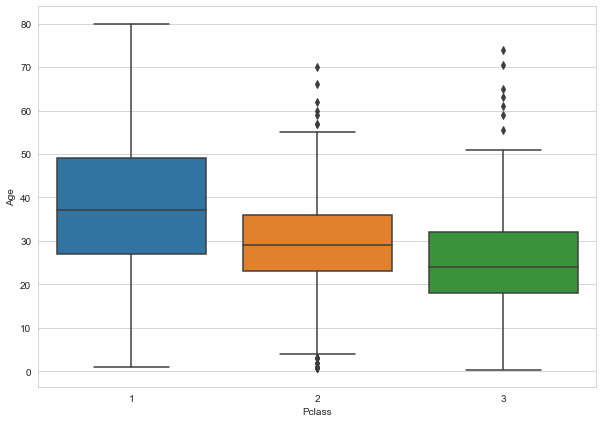

In [10]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=data)

In [11]:
# function to fill null age values with their mean as seen in th box plot above
# we can aslo put data['Age'].mean() according to their classes instead of giving number directly
def fill_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37 
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age

In [12]:
# Applying the function to the dataset
data['Age']=data[['Age','Pclass']].apply(fill_age,axis=1)

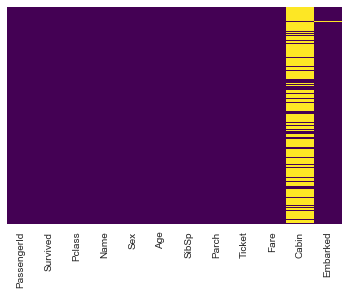

In [13]:
# All age data is filled and no single NULL value is present in AGE
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
# As the cabin has lots of missing values it is just dropped as we cannot use it
data.drop('Cabin',axis=1,inplace=True)

In [15]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


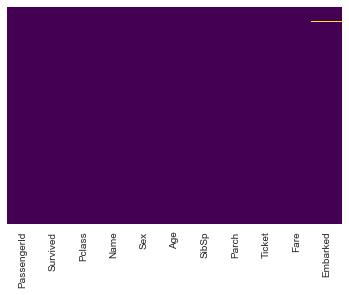

In [16]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
# removes any null data prsent
data.dropna(inplace=True)

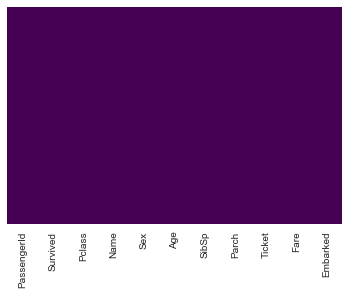

In [18]:
# Now dataset is ready without any NULL data
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
# Creating datas for variables
sex=pd.get_dummies(data['Sex'],drop_first=True)

In [20]:
embarked=pd.get_dummies(data['Embarked'],drop_first=True)

In [21]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
data=pd.concat([data,sex,embarked],axis=1)

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [24]:
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [25]:
data.drop(['PassengerId'],axis=1,inplace=True)

In [26]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [27]:
X=data.drop('Survived',axis=1)
y=data['Survived']

In [28]:
# LINEAR REGRESSION MODEL

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_data,X_test,y_data,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model=LogisticRegression()

In [33]:
model.fit(X_data,y_data)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
predictions=model.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [37]:
confusion=confusion_matrix(y_test,predictions)

In [38]:
TN = confusion [0,0]
FP = confusion [0,1]
FN = confusion [1,0]
TP = confusion [1,1]

In [39]:
print(confusion)
print ("TN: ", TN)
print ("FP: ", FP)
print ("FN: ", FN)
print ("TP: ", TP)

[[148  15]
 [ 36  68]]
TN:  148
FP:  15
FN:  36
TP:  68


In [40]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,predictions)
accuracy1 = (TN+TP)/(TN+TP+FN+FP)
print ("Accuracy from metrics: ", round(accuracy,3))
print ("Accuracy Calculated: ", round(accuracy1,3))

Accuracy from metrics:  0.809
Accuracy Calculated:  0.809


In [41]:
 print (round((FP+FN)/float(TP+TN+FP+FN),3))
print (round(1-metrics.accuracy_score(y_test, predictions),4))


0.191
0.191


In [42]:
print ("RECALL:", metrics.recall_score(y_test,predictions))
print("CALCULATED RECALL: ", (TP)/(TP+FN))

RECALL: 0.6538461538461539
CALCULATED RECALL:  0.6538461538461539


In [43]:
print ("SPECIFICITY/TRUE NEGATIVE RATE:", (TN)/(TN+FP))

SPECIFICITY/TRUE NEGATIVE RATE: 0.9079754601226994


In [44]:
print("FALSE POSITIVE RATE: ",(FN)/(FN+TP))

FALSE POSITIVE RATE:  0.34615384615384615


In [45]:
print("FALSE NEGATIVE RATE: ",(FP)/(TN+FP))

FALSE NEGATIVE RATE:  0.09202453987730061


In [46]:
print ("Precision: ", round(metrics.precision_score(y_test,predictions),2))
print ("PRECISION CALCULATED: ", round(TP/float(TP+FP),2))

Precision:  0.82
PRECISION CALCULATED:  0.82


In [47]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy = accuracy_score(y_test,predictions)
recall = recall_score(y_test,predictions)
precision = precision_score(y_test,predictions)
f1 = f1_score(y_test,predictions)
roc_auc = roc_auc_score(y_test,predictions)
print('Accuracy is :' ,round(accuracy,2)*100)
print('F1 score is :' ,round(f1,2)*100)
print('Precision is :',round(precision,2)*100)
print('Recall is :',round(recall,4)*100)
print('Roc Auc is :',round(roc_auc,2)*100)

Accuracy is : 81.0
F1 score is : 73.0
Precision is : 82.0
Recall is : 65.38000000000001
Roc Auc is : 78.0


In [48]:
#KNN MODEL

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn=KNeighborsClassifier()

In [51]:
knn.fit(X_data,y_data)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [52]:
predict_knn=knn.predict(X_test)

In [53]:
confusion_matrix(y_test,predict_knn)

array([[121,  42],
       [ 42,  62]], dtype=int64)

In [54]:
print(accuracy_score(y_test,predict_knn)*100)

68.53932584269663


In [55]:
error=[]
accuracy_knn_le=[]
for i in range(1,50,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_data,y_data)
    predict_i=knn.predict(X_test)
    error.append(np.mean(predict_i!=y_test))
    accuracy_knn_le.append(accuracy_score(y_test,predict_i))

Text(0, 0.5, 'Mean Error')

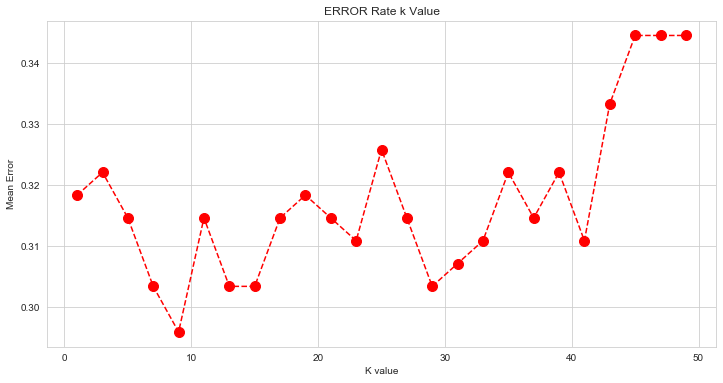

In [56]:
plt.figure(figsize=(12,6))
plt.plot(range(1,50,2),error,color='red',linestyle='dashed',marker='o',markersize=10)
plt.title("ERROR Rate k Value")
plt.xlabel("K value")
plt.ylabel("Mean Error")

In [57]:
knn_le=KNeighborsClassifier(n_neighbors=9)
knn_le.fit(X_data,y_data)
predict_knn_9=knn_le.predict(X_test)

In [58]:
confusion_matrix(y_test,predict_knn_9)

array([[128,  35],
       [ 44,  60]], dtype=int64)

In [59]:
print(accuracy_score(y_test,predict_knn_9)*100)

70.4119850187266


Text(0, 0.5, 'Mean accuracy')

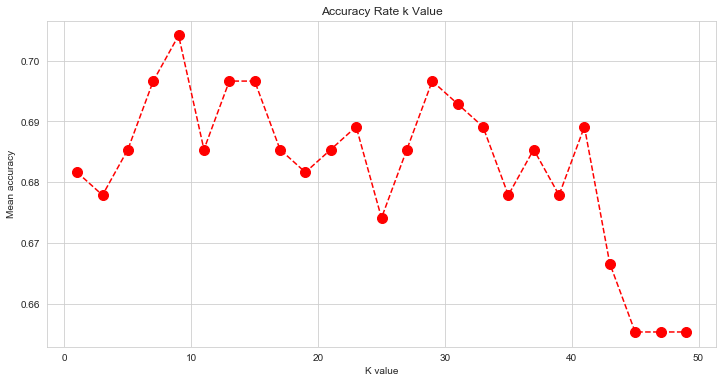

In [60]:
plt.figure(figsize=(12,6))
plt.plot(range(1,50,2),accuracy_knn_le,color='red',linestyle='dashed',marker='o',markersize=10)
plt.title("Accuracy Rate k Value")
plt.xlabel("K value")
plt.ylabel("Mean accuracy")

In [61]:
##DECISION TREE MODEL

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
classifier=DecisionTreeClassifier(random_state=102)

In [64]:
classifier.fit(X_data,y_data)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=102, splitter='best')

In [65]:
tree_pred=classifier.predict(X_test)

In [66]:
print("DECISION TREE ACCURACY")
print(accuracy_score(y_test,tree_pred)*100)

DECISION TREE ACCURACY
80.14981273408239


In [67]:
confusion_matrix(y_test,tree_pred)

array([[139,  24],
       [ 29,  75]], dtype=int64)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


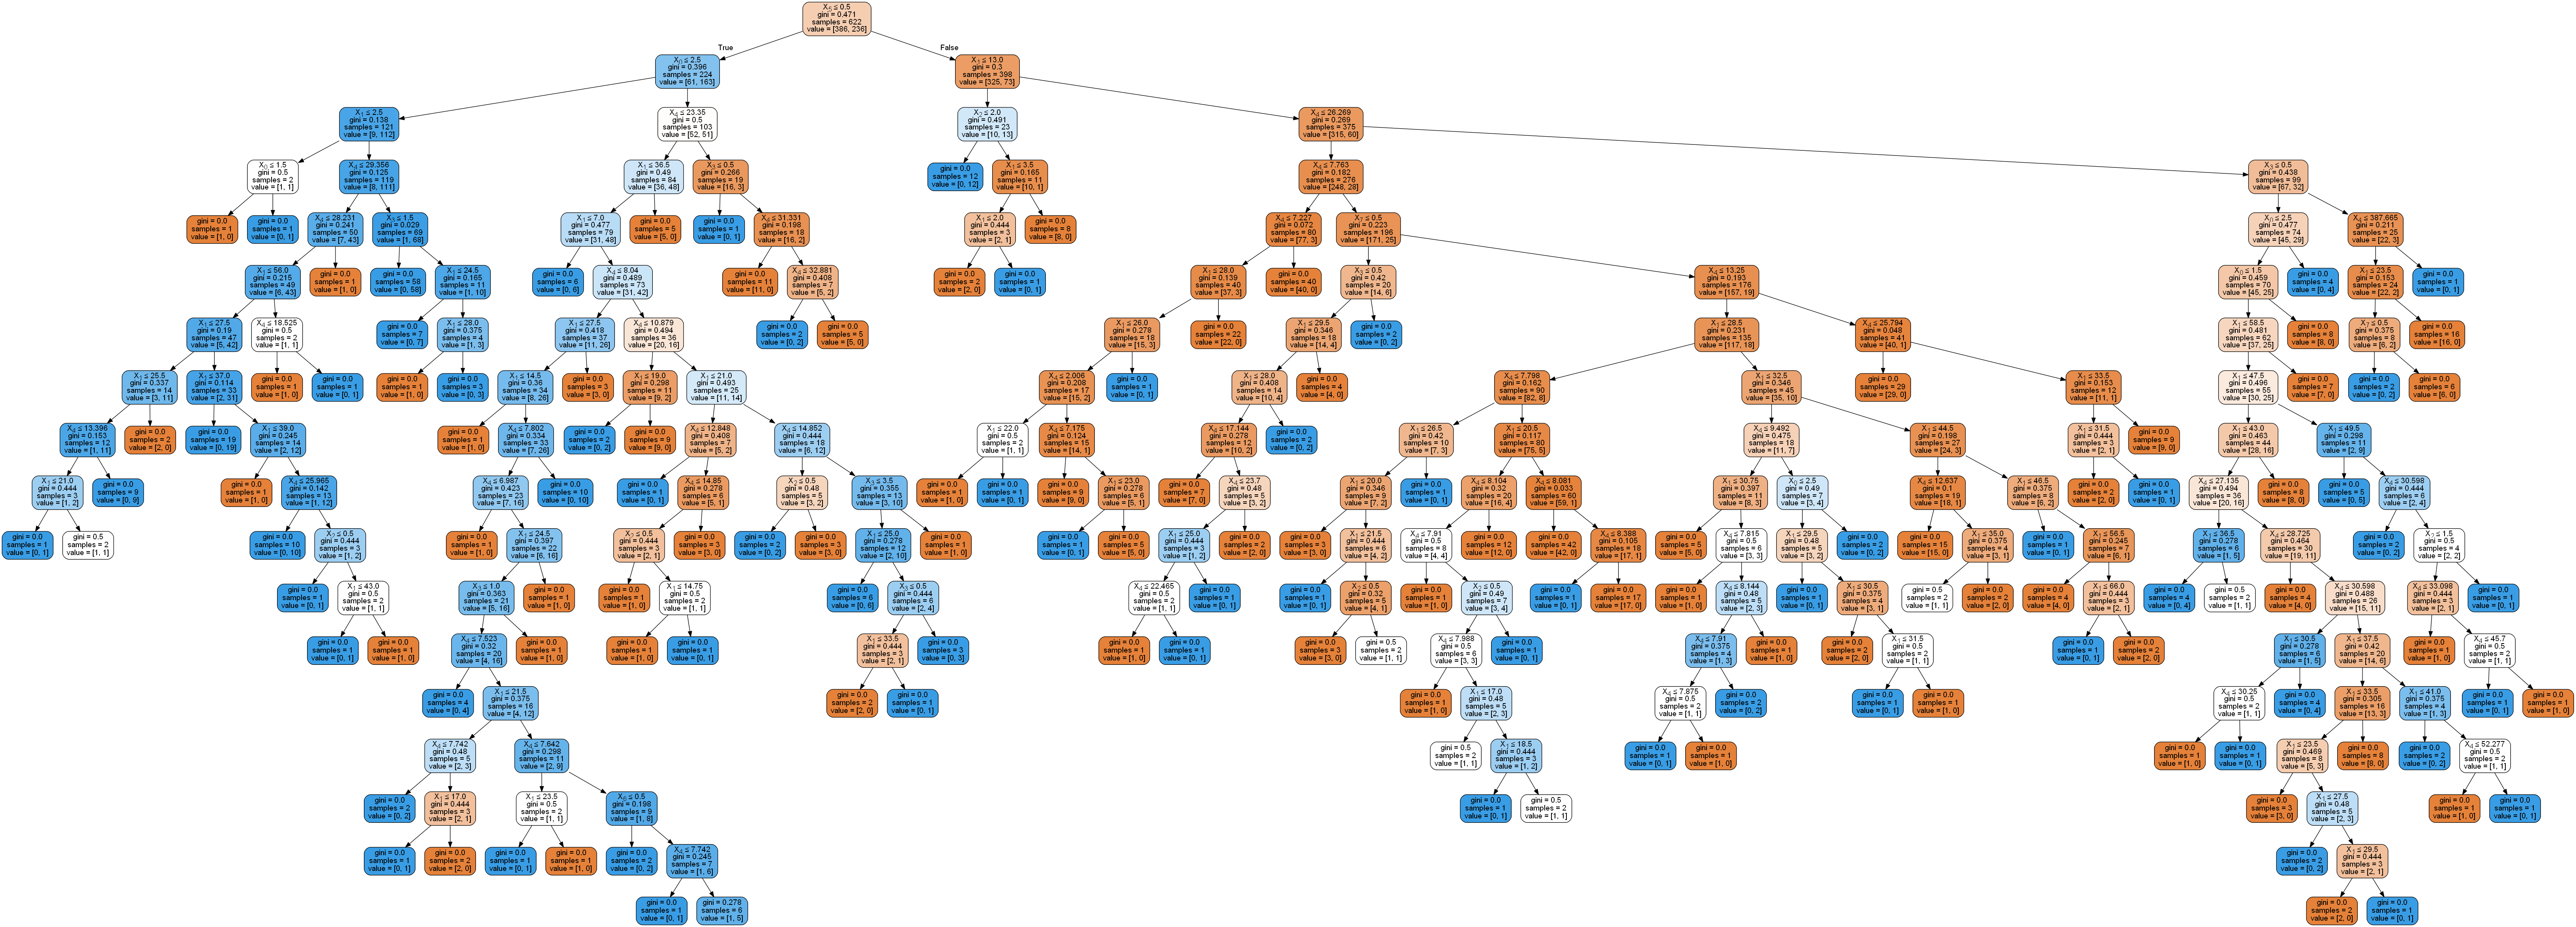

In [68]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
 filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=12000, height=12000)

In [69]:
#RANDOM FOREST CLASSIFIER

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
clf=RandomForestClassifier()

In [72]:
clf.fit(X_data,y_data)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
rf_pred=clf.predict(X_test)
rf_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [74]:
y_test.values

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [75]:
print("RANDOM FOREST ACCURACY")
print(accuracy_score(y_test,rf_pred)*100)

RANDOM FOREST ACCURACY
80.52434456928839


In [76]:
confusion_matrix(y_test,rf_pred)

array([[142,  21],
       [ 31,  73]], dtype=int64)

In [77]:
print("Accuracy of LOGISTIC REGRESSION MODEL is           :" ,round(accuracy,2)*100)
print("Accuracy of KNN with random number of neighbors is :",accuracy_score(y_test,predict_knn)*100)
print("Accuracy of KNN with least error rate is           :",accuracy_score(y_test,predict_knn_9)*100)
print("ACCURACY of DECISION TREE MODEL is                 :",accuracy_score(y_test,tree_pred)*100)
print("ACCURACY of RANDOM FOREST MODEL is                 :",accuracy_score(y_test,rf_pred)*100)

Accuracy of LOGISTIC REGRESSION MODEL is           : 81.0
Accuracy of KNN with random number of neighbors is : 68.53932584269663
Accuracy of KNN with least error rate is           : 70.4119850187266
ACCURACY of DECISION TREE MODEL is                 : 80.14981273408239
ACCURACY of RANDOM FOREST MODEL is                 : 80.52434456928839


In [78]:
print("So the best model to predict the SURVIVED is RANDOM FOREST with an accuracy of : {} %".format(round(accuracy_score(y_test,rf_pred)*100),2))

So the best model to predict the SURVIVED is RANDOM FOREST with an accuracy of : 81.0 %
